#1. Entity Extraction

###Entity Extraction Using spaCy

In this section, I perform entity extraction on the movie plots data using Python’s spaCy library. Second, We then go further to find relations between entities and noun phrases, again using spaCy. Then finally, we find the most prevalent relations in the movie plots data set with some basic statistics.


###Why is Entity Extraction Important for creating Knowledge Graphs?

Together with the creation of knowledge graphs, entity extraction is an important part of knowledge mining technologies. Entity extraction provides the building blocks needed for creating knowledge graphs. It helps find specific categories of terms such as geographical locations, person names, and so on. When used together with knowledge graphs, it allows for more specific searching by leveraging entity extraction’s ability to dig through sentence syntactic structure. 

In this section, we are extracting entities from a sample text document using one of the most popular NLP libraries called spaCy. In addition, we're also visualizing the results, using the library's graphical capabilities


###spaCy's Capabilities for Entity Extraction 

In spaCy, documents are processed with data pipelines. After tokenization, spaCy parses and tags the output of the tokenization step. The library's built‑in statistical models are used and enable it to make a prediction on which tag or label most likely applies in each context. The models are trained on large datasets in order to generalize across a language, such as English.

The output of spaCy's tagger consists of the following information: 
* the text, the original word text; 
* the lemma, the base form of the word; 
* the part of speech, the simple part of speech tag; 
* the tag, the detailed part of speech tag; 
* dep, syntactic dependency, for example, the relations between tokens; 
* shape the word shape, capitalization, punctuation, digits, and so on, 
* is_alpha, is the token an alpha character, 
* is_stop, is the token part of a stop list, for example, the most common words in the language? 


SpaCy features a fast and accurate syntactic dependency parser, and has a rich API for navigating the tree. The parser also powers the sentence boundary detection and lets you iterate over base noun phrases or chunks. 

Noun chunks are base noun phrases, flat phrases that have a noun as their head. A head is the head of a sentence tree. You can think of noun chunks as a noun plus the words describing the noun, for example, autonomous cars or insurance liability. To get the noun chunks in a document, simply iterate over doc.noun_chunks. SpaCy uses the terms head and child to describe the words in sentences connected by simple arcs in the dependency tree. 

The term dep is used for the arc label, which describes the type of syntactic relations that connect the child to the head. Because the syntactic relations form a tree, every word has exactly one head. You can therefore iterate over the arcs in the tree by iterating over the words in the sentence. I will use this library functionality in the upcoming code example.


In this section, we understand how to find relations between entities using spaCy's library capability called dependency parsing. We start off by including the necessary dependencies, the pandas library and a directive for being able to see the plots inside a jupyter notebook and load the dataset in cave format before converting it into a pandas data frame. Next, the spacy Library, and from spacy library, the displacy visualization capability.  


In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
#Mounting my personal google drive where the dataset is stored so that I can use it directly in Colab
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Load the dataset obtained from Kaggle
movie_plots_data = pd.read_csv('/content/gdrive/MyDrive/Shopify Application/wiki_movie_plots_deduped.csv')

##1.1 Topic Modeling
The next command loads the best matching version of spacy models downloaded from my specific library installation. Thereafter, filter out most of the data to speed up execution, including only movies that are released on or after 2015 and which are of genre comedy.

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


### Selecting a subset of the data: Movies released on or after 2015 and of the genre Comedy

In [ ]:
movie_plots_selection = movie_plots_data[(movie_plots_data['Release Year'] > 2015) & movie_plots_data['Genre'].str.contains('comedy')]

In [ ]:
movie_plots = movie_plots_selection.Plot
movie_plots.head()

17030    The film starts in Miami on the boat of crime ...
17032    Norm the polar bear is the son of the king of ...
17033    Jason Kelly is a lawyer who works for his fath...
17038    In the spirit realm, Oogway fights against an ...
17041    In 1951, Eddie Mannix (Josh Brolin) is the hea...
Name: Plot, dtype: object

##1.2 Extract Entities

Next, I continue by showcasing how to extract named entities using spacy built‑in capabilities. I use the text from the first movie plot and limit its size to up to 1000 characters. I process it using spacy nlp method to extract the entities. There are now two paragraphs containing plenty of person names such as Griffin, Mayfield, James, and Ben, as well as geographical locations such as Miami and Atlanta. 


In [ ]:
txt = movie_plots[movie_plots.index[0]][0:1000]

In [ ]:
doc = nlp(txt)

In [ ]:
print('INPUT:', txt)

INPUT: The film starts in Miami on the boat of crime lord Antonio Pope. His hacker A.J. is going through a list on the computer. Pope calls Port Commissioner Griffin on the phone and accuses him of stealing money from him. With one of his hitmen in the room, Pope has Griffin killed in his apartment, then orders his hitmen to find whoever left with his money.
Meanwhile in Atlanta, James is with his partner Detective Mayfield as they go to infiltrate a vehicle meet to find an infamous drug dealer named Troy. Ben, fresh out the academy, is eager to get in on the action, but James has him staying on the radio. James gets close enough to Troy, but Troy pulls a gun on him. Ben sees this over the camera and sneaks out to help. He rides into the meet in a showy car with hydraulics and draws unwanted attention to himself. He threatens Troy by acting tough dancing only to drop his badge in front of the crook. Then within seconds a brief shootout occurs leading to a random plan "B" with Mayfield 

Let's check how the output of the processing looks like. 

In [ ]:
print('OUTPUT:', [(x.text, x.label_) for x in doc.ents])

OUTPUT: [('Miami', 'GPE'), ('Antonio Pope', 'PERSON'), ('A.J.', 'GPE'), ('Pope', 'PERSON'), ('Port', 'GPE'), ('Griffin', 'PERSON'), ('one', 'CARDINAL'), ('Pope', 'PERSON'), ('Griffin', 'GPE'), ('Atlanta', 'GPE'), ('James', 'PERSON'), ('Detective Mayfield', 'PERSON'), ('Troy', 'PERSON'), ('Ben', 'PERSON'), ('James', 'PERSON'), ('James', 'PERSON'), ('Troy', 'GPE'), ('Troy', 'PERSON'), ('Ben', 'PERSON'), ('seconds', 'TIME'), ('Mayfield', 'PERSON')]


As you can see, it has successfully identified all entities, such as person names or geographical locations. Remarkably, it was able to detect Troy as a person name, not as a geographical location. 


##1.3 Entities Visualization

Now, in a visual format using displacy method: For that, I'm using the render method and pass as arguments the style set to type entities and the jupyter flag set to true in order to avoid entering the interactive mode. We notice immediately there are plenty of person names, two geopolitical entities, one product name, one cardinal entity, and one time entity. It is a brilliant tool for quickly visualizing the output of the library's named entity recognition functionality.


In [ ]:
displacy.render(doc, style='ent', jupyter=True)

##1.4 Extract Dependencies
Now, some basic statistics for analyzing the most important relations we just found between named entities extracted from the movie plots. 

I begin the task of extracting dependencies by defining a method called filter_spans that takes as input a list of text spans. The first thing that it does is to filter a sequence of texts so they don't contain overlaps or duplicates. This is useful for creating named entities since one token can only be part of one entity, or when merging spans with the ‘retokenizer.merge’ method. When spans overlap, the first/longest span is preferred over shorter spans. I'm using the libraries built‑in filter spans method for sorting them. 


In [ ]:
def filter_spans(spans):
    sorted_spans = spacy.util.filter_spans(spans)
    result = []
    seen_tokens = set()
    for span in sorted_spans:
        if span.start not in seen_tokens and span.end-1 not in seen_tokens:
            result.append(span)
        seen_tokens.update(range(span.start, span.end))
    result = sorted(result, key=lambda span: span.start)
    return result

Next, I create a method called extract_entity_relations that takes as input the document I'm processing and the list of relations defined as entity types. I merge entities and noun chunks into one list. I go through all paths and mark them for merging. Their attributes will be applied to the resulting token if they have context information, token attributes such as lemma or depth, or to the underlying lexeme, if they have context independent lexical attributes, such as lower or is stop. Next, I'm going through the relation types and filter to include only those of interest, such as person names or geopolitical entities. 

After this, I search for a subject of the document by searching if the dependency is of type nominal subject. Please beware that spacy uses the terms head and child to describe words connected by a single arc in the dependency tree. Token.lefts and token.rights attributes provide sequences of syntactic children that occur before and after a given token. Both sequences are in sentence order. 

Finally, I check if syntactic dependency labels are of type object of prepositions and entities head is of type prepositional modifier. If this condition holds, I am appending the found relation to the method return list. Please note that both methods are slight modifications of functions found on spacy's online documentation

In [ ]:
def extract_entity_relations(doc, relation_types):
    spans = list(doc.ents) + list(doc.noun_chunks)
    spans = filter_spans(spans)
    with doc.retokenize() as retokenizer:
        for span in spans:
            retokenizer.merge(span)
    
    relations = []
    for relation_type in relation_types:
        for entity in filter(lambda w: w.ent_type_ == relation_type, doc):
            if entity.dep_ in ('attr', 'dobj'):
                subject = [w for w in entity.head.lefts if w.dep_ == 'nsubj']
                if subject:
                    subject = subject[0]
                    relations.append((subject, entity))
                elif entity.dep_ == 'pobj' and entity.head.dep_ == 'prep':
                    relations.append(entity.head.dep_, entity)
    return relations

In order to test the two methods, let's run them on the sample text we have defined at the beginning of the demo. I'm only interested in person entities and display the found object, the noun phrase, and the entity type

In [ ]:
relations = extract_entity_relations(doc, ['PERSON'])

In [ ]:
if relations:
    for r1, r2 in relations:
        print("{:<10} -> {} ({})".format(r1.text, r2.text, r2.ent_type_))

As you can see, it has found relations between Pope and He as noun phrases and Port Commissioner Griffin and Troy as person entities. Let's now scale up the experiment to the filter dataset I created at the beginning of the demo. 


I start by creating a dictionary where all found relations will be stored into. Next, I'm iterating through all the movie plots and extracting relations using the extract entity relations method and only consider person and geopolitical entities/relations. For each relation, I'm storing the found noun phrases, their entities, and the entity types. Finally, I'm converting the dictionary into a pandas dataframe using from_dict method to continue processing and visualization using pandas library. 


In [ ]:
relations_dict = {"noun_phrase": [], "entity": [], "entity_type": []}

In [ ]:
relations_dict = {'noun_phrase': [], 'entity': [], 'entity_type': []}
for plot in movie_plots:
    doc = nlp(plot)
    relations = extract_entity_relations(doc, ['PERSON', 'GPE'])
    if relations:
        for r1, r2 in relations:
            relations_dict['noun_phrase'].append(r1.text)
            relations_dict['entity'].append(r2.text)
            relations_dict['entity_type'].append(r2.ent_type_)

In [ ]:
relations_df = pd.DataFrame.from_dict(relations_dict)

Here is how the newly‑created data frame looks like. It contains a column with noun phrases, a column with entities, and a column with entity types. 

In [ ]:
relations_df.head()

,noun_phrase,entity,entity_type
0,Pope,Port Commissioner Griffin,PERSON
1,James,Troy,PERSON
2,James,Ben,PERSON
3,Lt. Brooks,James,PERSON
4,Angela,James,PERSON


##1.5 Most Popular Subjects
Let's now find out what are the most popular subjects we just computed using the filtered data set. I'm grouping the data based on noun_phrases column, compute the number of rows for each subject, and plot the top most popular items.

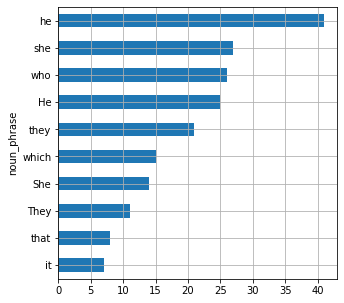

In [ ]:
relations_df.groupby(['noun_phrase']).size().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(5,5), grid=True)

As you can see: he, who, she, and they are the most frequent items. 


Now, let's see for noun_phrase ‘he’, what are the most frequent relations it has found. 

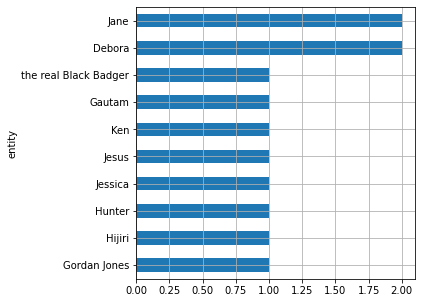

In [ ]:
relations_df[relations_df['noun_phrase']=='he'].groupby(['entity']).size().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(5,5), grid=True)

Debora and Jane are the top relations. 


##1.6 Most Popular Subjects
We do the opposite experiment and start from the most frequent subject/entities. 

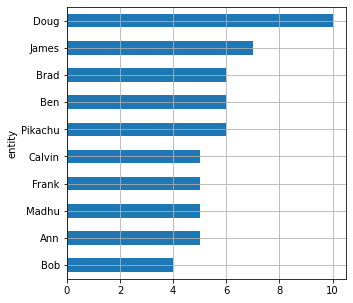

In [ ]:
relations_df.groupby(['entity']).size().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(5,5), grid=True)

We notice Doug, James, and Brad as the top frequent ones. 


Let's see what are the most popular relations it has found and who are the ones that are pointing to our Doug person name.

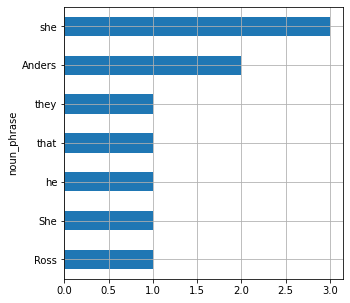

In [ ]:
relations_df[relations_df.entity=='Doug'].groupby(['noun_phrase']).size().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(5,5), grid=True)

These are ‘she’ and ‘Anders’. 



The purpose of the last two experiments is to show you that we already see the glimpses of knowledge graphs using named entity extraction. These are the first steps for finding relations/links between entities. We will continue this path and make further use of spaCy NLP library for doing so. 
